In [1]:
import pandas as pd
import numpy as np
import pickle

In [2]:
df_train=pd.read_csv('train_final.csv',index_col=False)
labels=df_train[['784']]

In [3]:
df_train.drop(df_train.columns[[784]],axis=1,inplace=True)
df_train.head(10)

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,255,255,255,255,255,255,255,255,255,255,...,0,0,0,0,0,0,0,0,0,0
1,255,255,255,255,255,255,255,255,255,255,...,0,0,0,0,0,0,0,0,0,0
2,255,255,255,255,255,255,255,255,255,255,...,0,0,0,0,0,0,0,0,0,0
3,255,255,255,255,255,255,255,255,255,255,...,0,0,0,0,0,0,0,0,0,0
4,255,255,255,255,255,255,255,255,255,255,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,255,255,255,255,255,255,255,255,255,255,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,255,255,...,0,0,0,0,0,0,0,0,0,0
9,255,255,255,255,255,255,255,255,255,255,...,0,0,0,0,0,0,0,0,0,0


In [4]:
np.random.seed(1212)
import keras
from keras.models import Model
from keras.layers import *
from keras import optimizers
from keras.layers import Input, Dense
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.image_data_format()

'channels_last'

In [5]:
labels=np.array(labels)

In [6]:
from keras.utils.np_utils import to_categorical
cat=to_categorical(labels,num_classes=13)

In [7]:
print(cat[0])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [8]:
df_train.head(10)

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,255,255,255,255,255,255,255,255,255,255,...,0,0,0,0,0,0,0,0,0,0
1,255,255,255,255,255,255,255,255,255,255,...,0,0,0,0,0,0,0,0,0,0
2,255,255,255,255,255,255,255,255,255,255,...,0,0,0,0,0,0,0,0,0,0
3,255,255,255,255,255,255,255,255,255,255,...,0,0,0,0,0,0,0,0,0,0
4,255,255,255,255,255,255,255,255,255,255,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,255,255,255,255,255,255,255,255,255,255,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,255,255,...,0,0,0,0,0,0,0,0,0,0
9,255,255,255,255,255,255,255,255,255,255,...,0,0,0,0,0,0,0,0,0,0


In [9]:
df_train.shape

(156617, 784)

In [10]:
temp=df_train.to_numpy()

In [11]:
X_train = temp.reshape(temp.shape[0], 28, 28, 1)

In [12]:
temp.shape[0]

156617

In [13]:
X_train.shape

(156617, 28, 28, 1)

In [14]:
l=[]
for i in range(156617):
    l.append(np.array(df_train[i:i+1]).reshape(1,28,28))

In [15]:
np.random.seed(7)

In [16]:
len(l[0])

1

In [17]:
X_train.shape

(156617, 28, 28, 1)

In [18]:
model = Sequential()
model.add(Conv2D(32, (3,3), input_shape=(28, 28,1), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(15, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(13, activation='softmax'))
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [19]:
from keras.models import model_from_json

In [20]:
model.fit(X_train, cat, epochs=10, batch_size=200,shuffle=True,verbose=1)

Epoch 1/10
784/784 [==============================] - 52s 64ms/step - loss: 0.4353 - accuracy: 0.8996
Epoch 2/10
784/784 [==============================] - 50s 64ms/step - loss: 0.0723 - accuracy: 0.9800
Epoch 3/10
784/784 [==============================] - 50s 63ms/step - loss: 0.0461 - accuracy: 0.9867
Epoch 4/10
784/784 [==============================] - 50s 64ms/step - loss: 0.0336 - accuracy: 0.9903
Epoch 5/10
784/784 [==============================] - 65s 82ms/step - loss: 0.0268 - accuracy: 0.9921
Epoch 6/10
784/784 [==============================] - 69s 88ms/step - loss: 0.0234 - accuracy: 0.9930
Epoch 7/10
784/784 [==============================] - 68s 87ms/step - loss: 0.0218 - accuracy: 0.9934
Epoch 8/10
784/784 [==============================] - 71s 90ms/step - loss: 0.0165 - accuracy: 0.9949
Epoch 9/10
784/784 [==============================] - 79s 101ms/step - loss: 0.0171 - accuracy: 0.9948
Epoch 10/10
784/784 [==============================] - 70s 89ms/step - loss: 0.01

In [21]:
model_json = model.to_json()
with open("model_final.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model_final.h5")

In [22]:
import cv2
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
# K.set_image_dim_ordering('th')
from keras.models import model_from_json

In [23]:
json_file = open('model_final.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model_final.h5")

In [24]:
print(5)

5


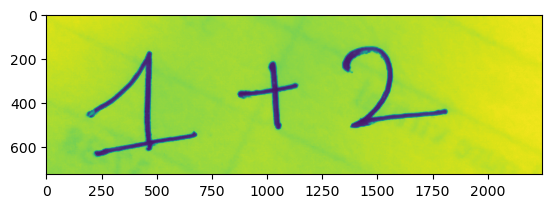

In [25]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
img = cv2.imread('test1.jpg',cv2.IMREAD_GRAYSCALE) # 1+ 2 written by me only
plt.imshow(img)

In [26]:
img

array([[186, 186, 185, ..., 188, 186, 187],
       [186, 186, 186, ..., 188, 187, 188],
       [184, 185, 187, ..., 188, 186, 187],
       ...,
       [167, 165, 164, ..., 184, 185, 185],
       [169, 164, 165, ..., 184, 184, 185],
       [166, 164, 166, ..., 184, 184, 184]], dtype=uint8)

In [27]:
if img is not None:
    #images.append(img)
    img=~img
    ret,thresh=cv2.threshold(img,127,255,cv2.THRESH_BINARY)
    ctrs,ret=cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    cnt=sorted(ctrs, key=lambda ctr: cv2.boundingRect(ctr)[0])
    w=int(28)
    h=int(28)
    train_data=[]
    print(len(cnt))
    rects=[]
    for c in cnt :
        x,y,w,h= cv2.boundingRect(c)
        rect=[x,y,w,h]
        rects.append(rect)
    print(rects)
    bool_rect=[]
    for r in rects:
        l=[]
        for rec in rects:
            flag=0
            if rec!=r:
                if r[0]<(rec[0]+rec[2]+10) and rec[0]<(r[0]+r[2]+10) and r[1]<(rec[1]+rec[3]+10) and rec[1]<(r[1]+r[3]+10):
                    flag=1
                l.append(flag)
            if rec==r:
                l.append(0)
        bool_rect.append(l)
    print(bool_rect)
    dump_rect=[]
    for i in range(0,len(cnt)):
        for j in range(0,len(cnt)):
            if bool_rect[i][j]==1:
                area1=rects[i][2]*rects[i][3]
                area2=rects[j][2]*rects[j][3]
                if(area1==min(area1,area2)):
                    dump_rect.append(rects[i])
    print(len(dump_rect)) 
    final_rect=[i for i in rects if i not in dump_rect]
    print(final_rect)
    for r in final_rect:
        x=r[0]
        y=r[1]
        w=r[2]
        h=r[3]
        im_crop =thresh[y:y+h+10,x:x+w+10]
        

        im_resize = cv2.resize(im_crop,(28,28))


        im_resize=np.reshape(im_resize,(28,28,1))
        train_data.append(im_resize)

16
[[185, 169, 500, 476], [196, 457, 3, 5], [197, 444, 13, 15], [207, 453, 3, 3], [208, 446, 7, 8], [211, 443, 3, 3], [869, 215, 274, 307], [1343, 147, 477, 369], [1386, 262, 3, 4], [1435, 172, 3, 3], [1438, 171, 3, 3], [1443, 170, 3, 3], [1444, 173, 3, 3], [1444, 169, 3, 3], [1448, 167, 8, 7], [1471, 493, 3, 3]]
[[0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1], [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0], [0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0], [0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0], [0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0], [0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 

In [28]:
s=''
for i in range(len(train_data)):
    train_data[i]=np.array(train_data[i])
    train_data[i]=train_data[i].reshape(1,28,28,1)
    #result=loaded_model.predict_classes(train_data[i])
    result=np.argmax(loaded_model.predict(train_data[i]), axis=-1)
    if(result[0]==10):
        s=s+'-'
    if(result[0]==11):
        s=s+'+'
    if(result[0]==12):
        s=s+'*'
    if(result[0]==0):
        s=s+'0'
    if(result[0]==1):
        s=s+'1'
    if(result[0]==2):
        s=s+'2'
    if(result[0]==3):
        s=s+'3'
    if(result[0]==4):
        s=s+'4'
    if(result[0]==5):
        s=s+'5'
    if(result[0]==6):
        s=s+'6'
    if(result[0]==7):
        s=s+'7'
    if(result[0]==8):
        s=s+'8'
    if(result[0]==9):
        s=s+'9'
    
print(s)

1/1 [==============================] - 0s 20ms/step
1+2


In [29]:
eval(s)

3

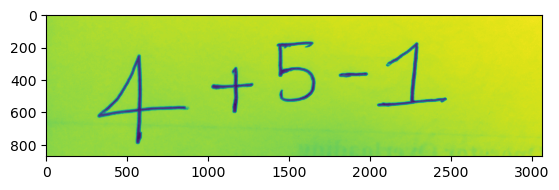

In [30]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
img = cv2.imread('test2.jpg',cv2.IMREAD_GRAYSCALE)  # 4 + 5 - 1 written by me only
plt.imshow(img)

In [31]:
img

array([[179, 179, 181, ..., 200, 200, 200],
       [179, 179, 180, ..., 200, 200, 200],
       [178, 180, 179, ..., 201, 200, 199],
       ...,
       [175, 174, 175, ..., 185, 186, 185],
       [177, 174, 174, ..., 186, 184, 184],
       [175, 173, 174, ..., 186, 185, 184]], dtype=uint8)

In [32]:
if img is not None:
    #images.append(img)
    img=~img
    ret,thresh=cv2.threshold(img,127,255,cv2.THRESH_BINARY)
    ctrs,ret=cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    cnt=sorted(ctrs, key=lambda ctr: cv2.boundingRect(ctr)[0])
    w=int(28)
    h=int(28)
    train_data=[]
    print(len(cnt))
    rects=[]
    for c in cnt :
        x,y,w,h= cv2.boundingRect(c)
        rect=[x,y,w,h]
        rects.append(rect)
    print(rects)
    bool_rect=[]
    for r in rects:
        l=[]
        for rec in rects:
            flag=0
            if rec!=r:
                if r[0]<(rec[0]+rec[2]+10) and rec[0]<(r[0]+r[2]+10) and r[1]<(rec[1]+rec[3]+10) and rec[1]<(r[1]+r[3]+10):
                    flag=1
                l.append(flag)
            if rec==r:
                l.append(0)
        bool_rect.append(l)
    print(bool_rect)
    dump_rect=[]
    for i in range(0,len(cnt)):
        for j in range(0,len(cnt)):
            if bool_rect[i][j]==1:
                area1=rects[i][2]*rects[i][3]
                area2=rects[j][2]*rects[j][3]
                if(area1==min(area1,area2)):
                    dump_rect.append(rects[i])
    print(len(dump_rect)) 
    final_rect=[i for i in rects if i not in dump_rect]
    print(final_rect)
    for r in final_rect:
        x=r[0]
        y=r[1]
        w=r[2]
        h=r[3]
        im_crop =thresh[y:y+h+10,x:x+w+10]
        

        im_resize = cv2.resize(im_crop,(28,28))


        im_resize=np.reshape(im_resize,(28,28,1))
        train_data.append(im_resize)

11
[[320, 251, 546, 546], [353, 609, 3, 3], [353, 606, 3, 3], [355, 606, 3, 4], [364, 311, 209, 300], [569, 528, 3, 4], [1023, 327, 256, 279], [1427, 171, 236, 366], [1811, 360, 176, 28], [2048, 176, 427, 391], [2103, 310, 15, 10]]
[[0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0], [1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0], [1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0], [1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0], [1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]]
14
[[320, 251, 546, 546], [1023, 327, 256, 279], [1427, 171, 236, 366], [1811, 360, 176, 28], [2048, 176, 427, 391]]


In [33]:
s=''
for i in range(len(train_data)):
    train_data[i]=np.array(train_data[i])
    train_data[i]=train_data[i].reshape(1,28,28,1)
    #result=loaded_model.predict_classes(train_data[i])
    result=np.argmax(loaded_model.predict(train_data[i]), axis=-1)
    if(result[0]==10):
        s=s+'-'
    if(result[0]==11):
        s=s+'+'
    if(result[0]==12):
        s=s+'*'
    if(result[0]==0):
        s=s+'0'
    if(result[0]==1):
        s=s+'1'
    if(result[0]==2):
        s=s+'2'
    if(result[0]==3):
        s=s+'3'
    if(result[0]==4):
        s=s+'4'
    if(result[0]==5):
        s=s+'5'
    if(result[0]==6):
        s=s+'6'
    if(result[0]==7):
        s=s+'7'
    if(result[0]==8):
        s=s+'8'
    if(result[0]==9):
        s=s+'9'
    
print(s)

1/1 [==============================] - 0s 19ms/step
4+5-1


In [34]:
eval(s)

8

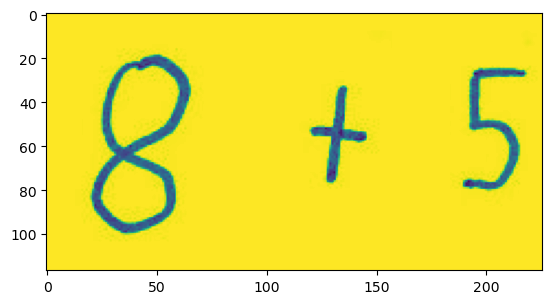

In [45]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
img = cv2.imread('test3.jpg',cv2.IMREAD_GRAYSCALE)  
plt.imshow(img)

In [46]:
img

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [47]:
if img is not None:
    #images.append(img)
    img=~img
    ret,thresh=cv2.threshold(img,127,255,cv2.THRESH_BINARY)
    ctrs,ret=cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    cnt=sorted(ctrs, key=lambda ctr: cv2.boundingRect(ctr)[0])
    w=int(28)
    h=int(28)
    train_data=[]
    print(len(cnt))
    rects=[]
    for c in cnt :
        x,y,w,h= cv2.boundingRect(c)
        rect=[x,y,w,h]
        rects.append(rect)
    print(rects)
    bool_rect=[]
    for r in rects:
        l=[]
        for rec in rects:
            flag=0
            if rec!=r:
                if r[0]<(rec[0]+rec[2]+10) and rec[0]<(r[0]+r[2]+10) and r[1]<(rec[1]+rec[3]+10) and rec[1]<(r[1]+r[3]+10):
                    flag=1
                l.append(flag)
            if rec==r:
                l.append(0)
        bool_rect.append(l)
    print(bool_rect)
    dump_rect=[]
    for i in range(0,len(cnt)):
        for j in range(0,len(cnt)):
            if bool_rect[i][j]==1:
                area1=rects[i][2]*rects[i][3]
                area2=rects[j][2]*rects[j][3]
                if(area1==min(area1,area2)):
                    dump_rect.append(rects[i])
    print(len(dump_rect)) 
    final_rect=[i for i in rects if i not in dump_rect]
    print(final_rect)
    for r in final_rect:
        x=r[0]
        y=r[1]
        w=r[2]
        h=r[3]
        im_crop =thresh[y:y+h+10,x:x+w+10]
        

        im_resize = cv2.resize(im_crop,(28,28))


        im_resize=np.reshape(im_resize,(28,28,1))
        train_data.append(im_resize)

8
[[21, 19, 44, 81], [23, 66, 33, 31], [28, 22, 34, 41], [30, 60, 3, 3], [46, 56, 3, 3], [121, 34, 25, 43], [133, 44, 3, 3], [190, 26, 28, 54]]
[[0, 1, 1, 1, 1, 0, 0, 0], [1, 0, 1, 1, 1, 0, 0, 0], [1, 1, 0, 1, 1, 0, 0, 0], [1, 1, 1, 0, 0, 0, 0, 0], [1, 1, 1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0]]
10
[[21, 19, 44, 81], [121, 34, 25, 43], [190, 26, 28, 54]]


In [48]:
s=''
for i in range(len(train_data)):
    train_data[i]=np.array(train_data[i])
    train_data[i]=train_data[i].reshape(1,28,28,1)
    #result=loaded_model.predict_classes(train_data[i])
    result=np.argmax(loaded_model.predict(train_data[i]), axis=-1)
    if(result[0]==10):
        s=s+'-'
    if(result[0]==11):
        s=s+'+'
    if(result[0]==12):
        s=s+'*'
    if(result[0]==0):
        s=s+'0'
    if(result[0]==1):
        s=s+'1'
    if(result[0]==2):
        s=s+'2'
    if(result[0]==3):
        s=s+'3'
    if(result[0]==4):
        s=s+'4'
    if(result[0]==5):
        s=s+'5'
    if(result[0]==6):
        s=s+'6'
    if(result[0]==7):
        s=s+'7'
    if(result[0]==8):
        s=s+'8'
    if(result[0]==9):
        s=s+'9'
    
print(s)

1/1 [==============================] - 0s 18ms/step
8+5


In [49]:
eval(s)

13